# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key
city_url = url+"&q="+"Minneapolis"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -93.2638, 'lat': 44.98},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 278.25,
  'feels_like': 275.71,
  'temp_min': 275.65,
  'temp_max': 280.31,
  'pressure': 1028,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 160},
 'clouds': {'all': 0},
 'dt': 1702604528,
 'sys': {'type': 2,
  'id': 2009535,
  'country': 'US',
  'sunrise': 1702561415,
  'sunset': 1702593112},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
   # Group cities in sets of 50 for logging purposes
     if (i % 50 == 0 and i >= 50):
         set_count += 1
         record_count = 0

     # Create endpoint URL with each city
     city_url = url+"&q="+city
    
     # Log the url, record, and set numbers
     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
     record_count += 1

     # Run an API request for each of the cities
     try:
         # Parse the JSON and retrieve data
         city_weather = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather["coord"]["lat"]
         city_lng = city_weather["coord"]["lon"]
         city_max_temp = city_weather["main"]["temp_max"]
         city_humidity = city_weather["main"]["humidity"]
         city_clouds = city_weather["clouds"]["all"]
         city_wind = city_weather["wind"]["speed"]
         city_country = city_weather["sys"]["country"]
         city_date = city_weather["dt"]

         # Append the City information into city_data list
         city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
     except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | rio branco do sul
Processing Record 3 of Set 1 | cynthiana
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | itaocara
Processing Record 6 of Set 1 | dunda
Processing Record 7 of Set 1 | mora
Processing Record 8 of Set 1 | rabaul
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | acarau
Processing Record 18 of Set 1 | piranhas
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | chonglong
Processing Record 22 of Set

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,288.32,77,0,9.44,NA,1702605155
1,rio branco do sul,-25.1900,-49.3142,296.33,87,91,1.00,BR,1702605155
2,cynthiana,38.3904,-84.2941,279.60,54,0,1.41,US,1702605156
3,papatowai,-46.5619,169.4708,293.40,55,56,1.85,NZ,1702605156
4,itaocara,-21.6692,-42.0761,295.04,92,27,1.13,BR,1702605157


In [8]:
# Export the City_Data into a csv
# city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,300.18,83,75,12.35,CK,1702244412
1,edinburgh of the seven seas,-37.0676,-12.3116,286.80,69,97,6.48,SH,1702244413
2,ushuaia,-54.8000,-68.3000,280.96,57,0,8.75,AR,1702244274
3,grytviken,-54.2811,-36.5092,278.77,90,100,6.68,GS,1702244276
4,kimbe,-5.5502,150.1429,297.95,97,100,1.17,PG,1702244415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

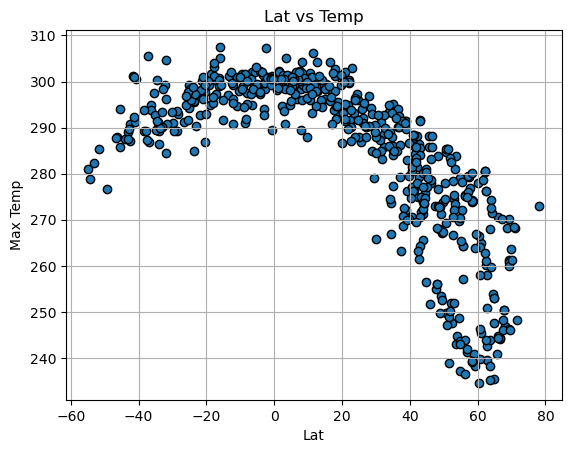

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Lat vs Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

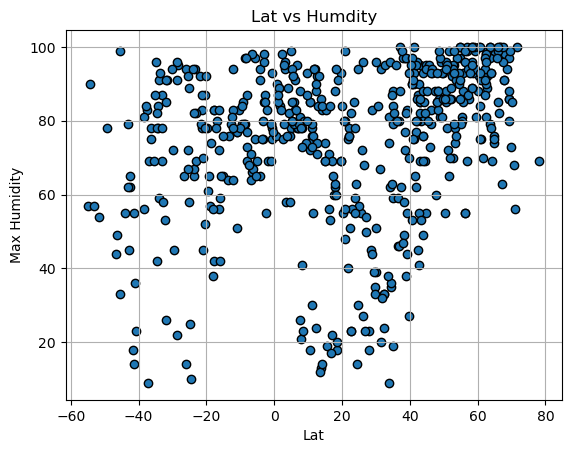

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Lat vs Humdity")
plt.xlabel("Lat")
plt.ylabel("Max Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

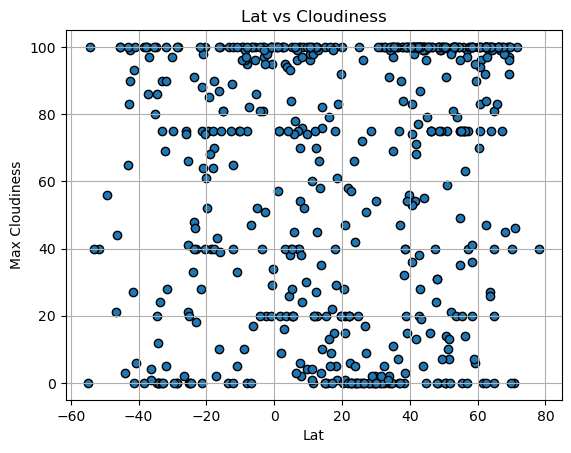

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Lat vs Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Max Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

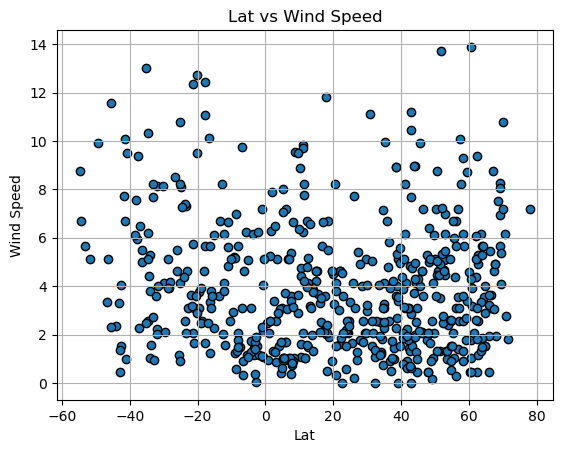

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.title("Lat vs Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


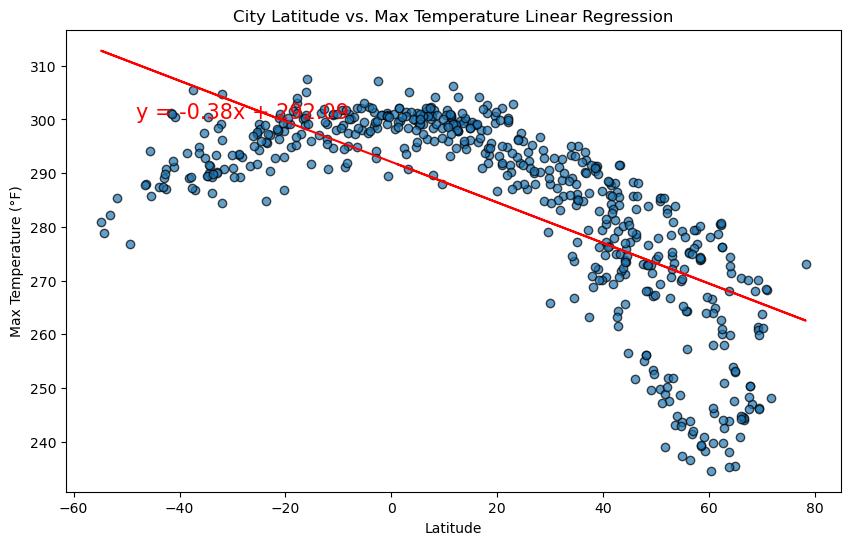

In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
# Call the function with appropriate data
create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "City Latitude vs. Max Temperature Linear Regression",
                              "output_data/lat_vs_temp_regression.png")

# Save the figure
plt.savefig("output_data/Fig5.png")
    
# Show the plot
plt.show()

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
print(southern_hemi_df.head())

                                City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                             avarua -21.2078 -159.7750    300.18        83   
1        edinburgh of the seven seas -37.0676  -12.3116    286.80        69   
2                            ushuaia -54.8000  -68.3000    280.96        57   
3                          grytviken -54.2811  -36.5092    278.77        90   
4                              kimbe  -5.5502  150.1429    297.95        97   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                75       12.35      CK  1702244412  
1                97        6.48      SH  1702244413  
2                 0        8.75      AR  1702244274  
3               100        6.68      GS  1702244276  
4               100        1.17      PG  1702244415  


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6928732230467852


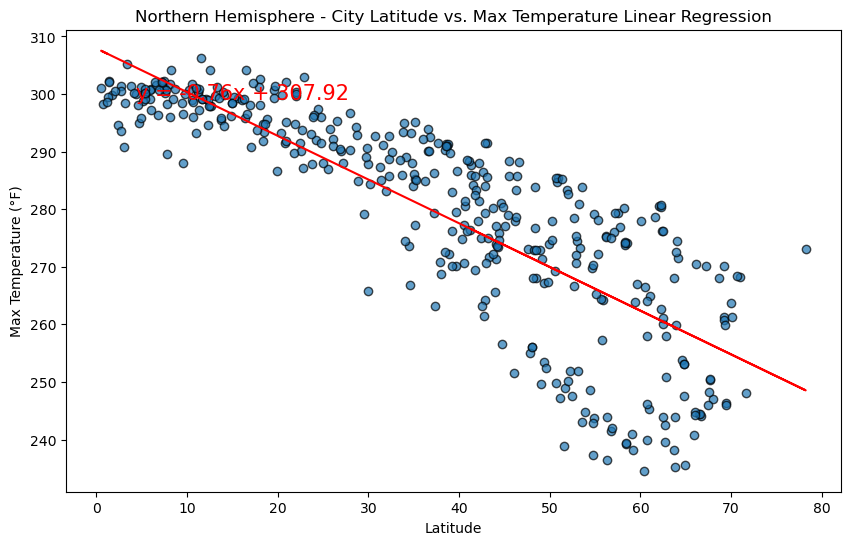

In [16]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")

The r-squared is: 0.6928732230467852


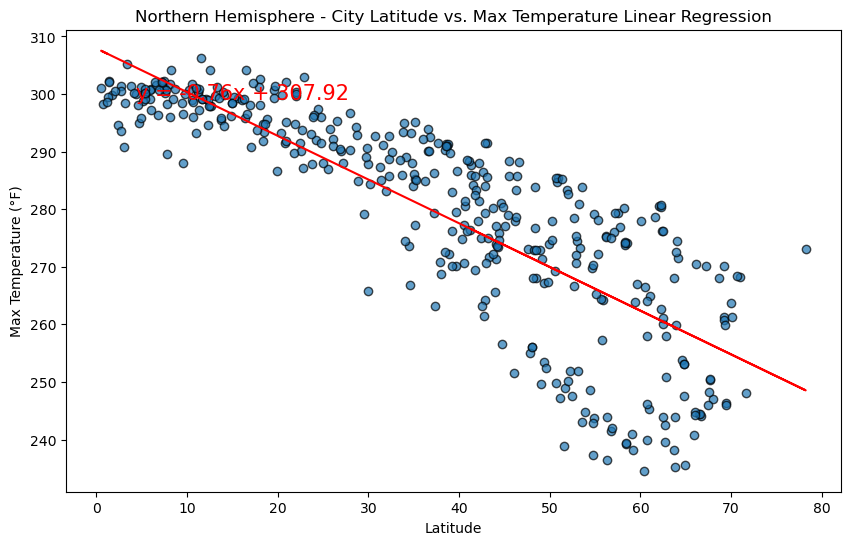

In [17]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.6928732230467852


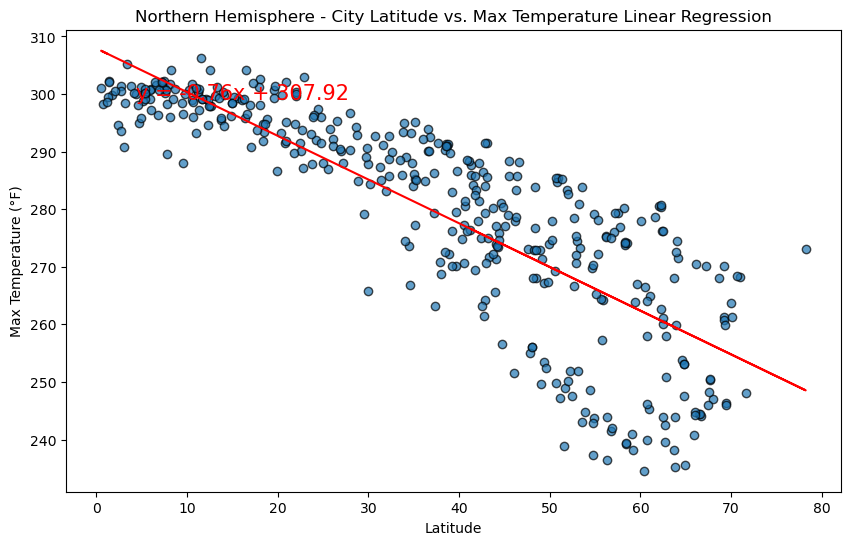

In [18]:
# Northern Hemisphere
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.9
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")

The r-squared is: 0.4141012709203073


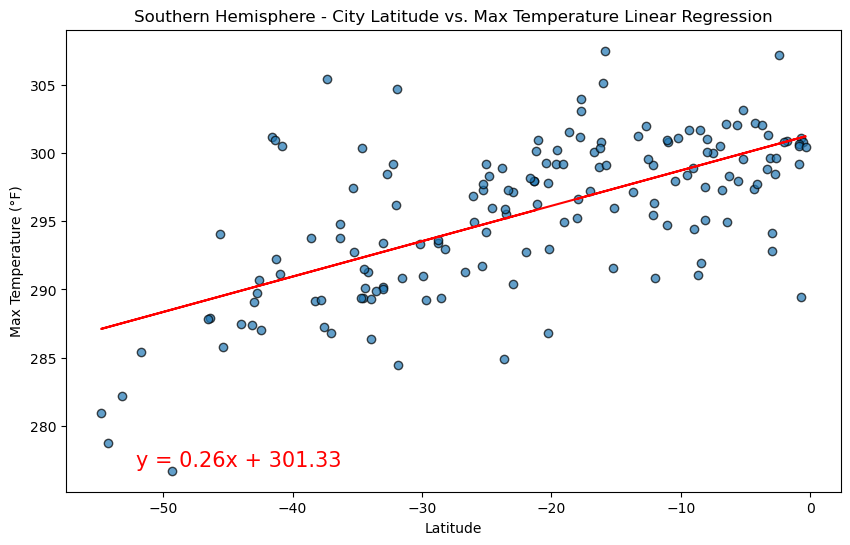

In [19]:
# Southern Hemisphere
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.05
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.01
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Create a DataFrame with Northern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Perform linear regression on Northern Hemisphere (using Max Temp vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)",
                              "Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression",
                              "output_data/northern_lat_vs_temp_regression.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05764368027470072


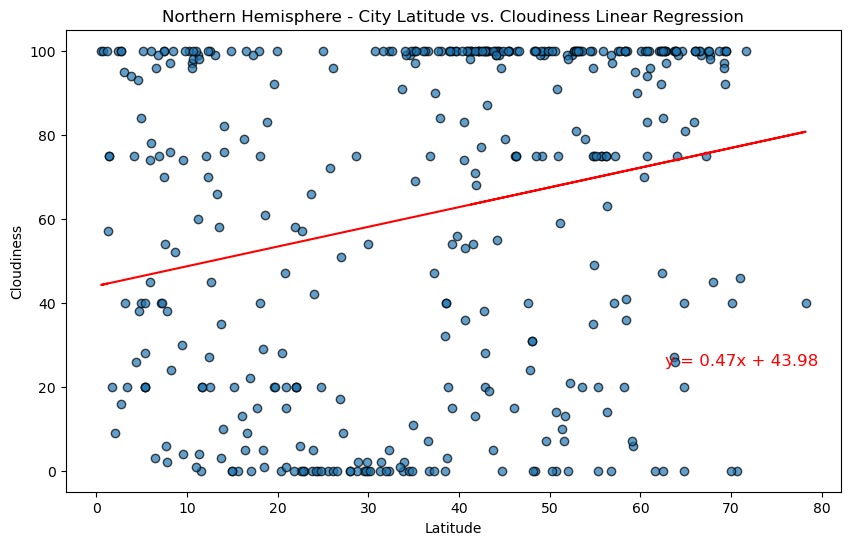

In [20]:
# Northern Hemisphere
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.8
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.25
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=12, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")

The r-squared is: 0.03890531013305498


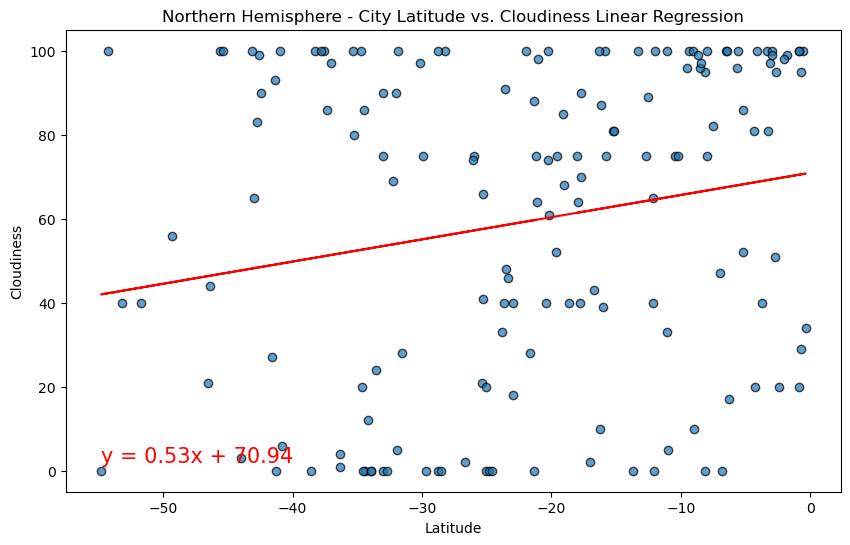

In [21]:
# Southern Hemisphere
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.0
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.02
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness",
                              "Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01174478930685536


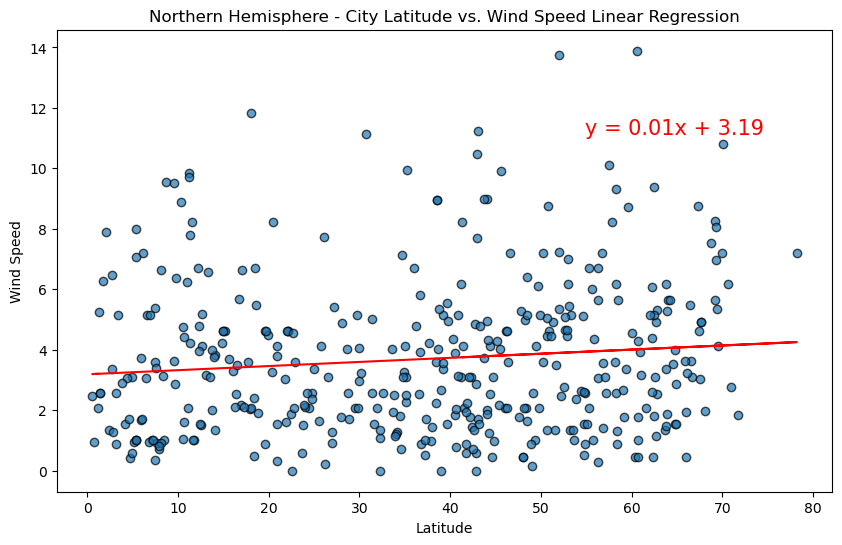

In [22]:
# Northern Hemisphere
def create_linear_regression_plot_north(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Northern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_north(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression")

The r-squared is: 0.08556561923118981


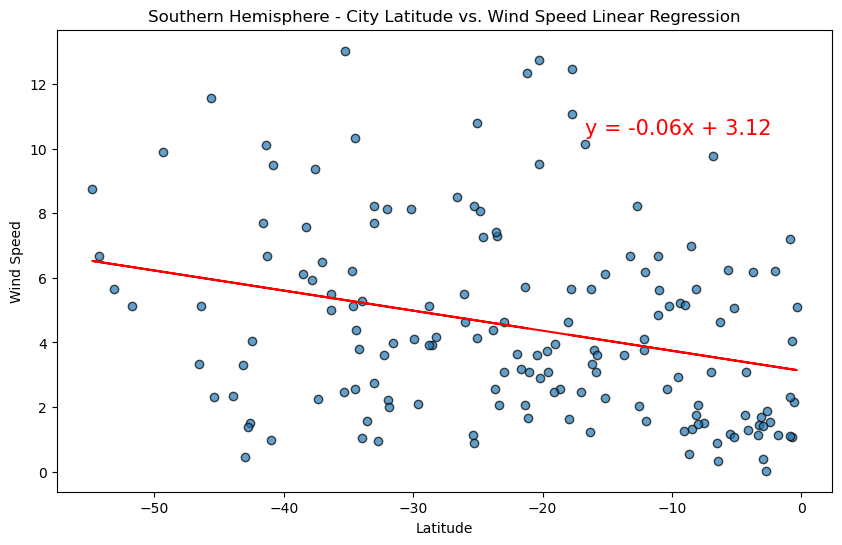

In [23]:
# Southern Hemisphere
def create_linear_regression_plot_south(x_data, y_data, x_label, y_label, title, save_filename=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_data, regress_values, "r-")
    
    # Add annotation with equation
    annotation_x = x_data.min() + (x_data.max() - x_data.min()) * 0.7
    annotation_y = y_data.min() + (y_data.max() - y_data.min()) * 0.8
    plt.annotate(line_eq, (annotation_x, annotation_y), fontsize=15, color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    # Show the plot
    print(f"The r-squared is: {r_value**2}")
    plt.show()

# Perform linear regression on Southern Hemisphere (using Humidity vs. Latitude)
create_linear_regression_plot_south(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed",
                              "Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE